## Cat's vrs Dogs CNN - Tensorflow Keras

### Imports

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

### Load the data

In [2]:
data = np.load('cats_v_dogs.npy', allow_pickle=True)
data.shape

(200, 2)

### Data visualisation

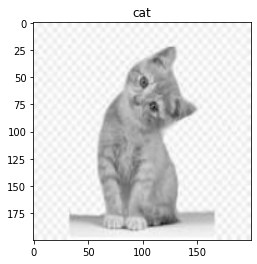

In [3]:
class_names = ["cat", "dog"]
test = data[0]
plt.imshow(test[0], cmap="gray")
plt.title(class_names[np.argmax(test[1])])
plt.show()


### Split data int train and test

In [28]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=.3, random_state=33 )
train.shape, test.shape

((140, 2), (60, 2))

In [29]:
X_train, y_train = [],[]
X_test, y_test = [],[]

for x, y_ in train:
    X_train.append(x)
    y_train.append(y_)

for x, y_ in test:
    X_test.append(x)
    y_test.append(y_)

In [30]:
len(X_test), len(y_test), len(X_train), y_test[:2]

(60, 60, 140, [array([1., 0.]), array([1., 0.])])

### Creating a CNN

In [31]:
input_shape = X_train[0].shape
input_shape

(200, 200, 3)

In [32]:
model = keras.Sequential([
  keras.layers.Conv2D(32, (3, 3), input_shape=input_shape, activation='relu'),
  keras.layers.MaxPool2D((2,2)),
  keras.layers.Conv2D(64, (3, 3), activation='relu'),
  keras.layers.MaxPool2D((2, 2)),
  keras.layers.Flatten(),
  keras.layers.Dense(64, activation='relu'),
  keras.layers.Dense(2, activation='sigmoid')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 198, 198, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 97, 97, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 147456)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                9437248   
_________________________________________________________________
dense_3 (Dense)              (None, 2)                

### Compiling the Model

In [36]:
model.compile(
    optimizer= keras.optimizers.Adam(lr=1e-3),
    loss = keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"]
)

### Training/Fitting the Model

In [39]:
BATCH_SIZE, EPOCHS = 6, 3
VALIDATION_SET = (np.array(X_test), np.array(y_test))

model.fit(np.array(X_train), np.array(y_train), verbose=2, epochs=EPOCHS, batch_size= BATCH_SIZE, validation_data = VALIDATION_SET)

Epoch 1/3
24/24 - 11s - loss: 1.7541e-07 - accuracy: 1.0000 - val_loss: 3.2643 - val_accuracy: 0.7667
Epoch 2/3
24/24 - 10s - loss: 1.6774e-07 - accuracy: 1.0000 - val_loss: 3.2654 - val_accuracy: 0.7667
Epoch 3/3
24/24 - 10s - loss: 1.6264e-07 - accuracy: 1.0000 - val_loss: 3.2668 - val_accuracy: 0.7667


### Making Predictions


In [43]:
np.round(model.predict(np.array(X_test[:4]))), y_test[:4]

(array([[1., 0.],
        [1., 0.],
        [1., 0.],
        [0., 1.]], dtype=float32),
 [array([1., 0.]), array([1., 0.]), array([1., 0.]), array([0., 1.])])